# **Python 예문에듀(2024년) 마무리문제**    

##### **Stellar Classification 데이터 (ROC-AUC)**
해당 데이터는 fedesoriano.(January 2022). Stellar Classification Dataset - SDSS17에서 주줄된 것이다. 원본 데이터는 kaggle에서 확인할 수 있으며, 일부 변수를 제거하는 등 이를 실습용으로 수정하였다. 데이터는 별의 관측 정보와 각종 필터값, 사용한 장비에 대한 정보를 담고 있다. 이를 이용해서 분류 분석을 진행해 보자.

아래는 Stellar Classification 데이터 세트를 변형시킨 데이터이다.    

① 제공 데이터 목록    
> ㉠ stellar_y_train.csv : 은하 여부 데이터(학습용), csv 형식의 파일    
> ㉡ stellar_X_train.csv, stellar_X_test.csv : 천체 관측 특성(학습용 및 평가용), csv 형식의 파일    

② 데이터 형식 및 내용
> ㉠ stellar_y_train.csv(70,000 데이터)    
> ㉡ stellar_X_train.csv(70,000 데이터), stellar_X_test.csv(30,000 데이터)    

주어진 학습용 데이터(stellar_X_train.csv, stellar_y_train.csv)를 활용하여 해당 천체가 은하인지 아닌지 예측하는 모형을 만든 후，이를 평가용 데이터 (stellar_X_test.csv)에 적용하여 얻은 천체의 은하 여부(은하인 경우를 1로 함)를 다음과 같은 형식의 csv 파일로 생성하시오. (단, 제출한 모델의 성능은 ROC-AUC 평가 지표에 따라 채점한다.)

[제출 파일 양식]

|galaxy|
|:-:|
|0|
|1|
|1|
|...|
|1|
|0|
|1|
|1|

데이터 세트는 총 14개의 컬럼으로 이루어져 있고 각각의 의미는 아래와 같다.    

|변수|설명|
|:-:|:-:|
|alpha|적경각|
|delta|적위각|
|u|측광 시스템의 자외선 필터|
|g|측광 시스템의 녹색 필터|
|r|측광 시스템의 적색 필터|
|i|측광 사스템의 근적외선 필터|
|z|측광 시스템의 적외선 필터|
|redshift|파장 증가에 따른 적색편이 값|
|run_ID|특정 검색을 식별하는데 사용되는 실행번호|
|rerun_ID|이미지 처리방법을 지정하는 재실행번호|
|cam_col|실행 중 관측선을 식별하는 카메라 열|
|field_ID|각 구역을 식별하는 구역 번호|
|plate|SDSS에서 각 plate를 식별하기 위한 ID|
|galaxy|천체의 은하 여부(1 일 때 은하, 0일 때 은하 X)|

이 중 galaxy 변수는 종속변수이다.

In [ ]:
import pandas as pd
x_test = pd.read_csv('https://raw.githubusercontent.com/eyejjang/BigData/main/dataset_yemoon/datasets/Part2/stellar_X_test.csv')
x_train = pd.read_csv('https://raw.githubusercontent.com/eyejjang/BigData/main/dataset_yemoon/datasets/Part2/stellar_X_train.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/eyejjang/BigData/main/dataset_yemoon/datasets/Part2/stellar_y_train.csv')

In [ ]:
print(x_test.info())
print(x_test.head())
print(x_train.info())
print(x_train.head())
print(y_train.info())
print(y_train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


# **Python 수제비(2024년) 모의고사 1회**    

##### **Telco Customer Churn 데이터**
```
데이터셋 :
https://raw.githubusercontent.com/eyejjang/BigData/main/dataset_sujebi/M1-4-1.csv
https://raw.githubusercontent.com/eyejjang/BigData/main/dataset_sujebi/M1-4-2.csv
```
```
 • CustomerID : 고객 ID
 • gender : 고객 성별
 • SeniorCitizen : 고령자 여부 (0, 1)
 • Partner : 고객이 파트너인지 여부 (Yes, No)
 • Dependents : 고객의 부양가족 여부 (Yes, No)
 • tenure : 회사에 머문 개월 수
 • PhoneService : 고객에게 전화 서비스가 있는지 여부 (Yes, No)
 • MultipleLines : 고객이 여러 회선을 사용하는지 여부 (Yes, No, No phone service)
 • InternetServices : 고객의 인터넷 서비스 제공업체 (DSL, Fiber optic, No)
 • OnlineSecurity : 고객의 온라인 보안 여부 (Yes, No, No internet service)
 • OnlineBackup : 고객의 온라인 백업 여부 (Yes, No, No internet service)
 • DeviceProtection : 고객의 기기 보호 여부 (Yes, No, No internet service)
 • TechSupport : 고객의 기술 지원 여부 (Yes, No, No internet service)
 • StreamingTV : 고객이 스트리밍 TV를 사용하는지 여부 (Yes, No, No internet service)
 • StreamingMovies : 고객이 스트리밍 영화를 가지고 있는지 여부 (Yes, No, No internet service)
 • Contract : 고객의 계약 기간 (Month-to-month, One year, Two year)
 • PaperlessBilling : 고객의 종이 없는 청구서 사용 여부 (Yes, No)
 • PaymentMethod : 고객의 결제 수단 (Electric check, Mailed Check, Bank transfer (automatic), Credit card (automatic))
 • MonthlyCharges : 매월 고객에게 청구되는 금액
 • TotalCharges : 고객에게 청구된 총 금액
 • Churn : 고객 이탈 여부 (Yes, No)
```
• 주어진 데이터는 telco-customer-churn 데이터 세트로 각 고객이 가입한 서비스와 계정 정보, 인구에 대한 통계 정보들이다. 주어진 훈련 데이터를 이용하여 모델을 훈련한 후 테스트 데이터로 고객의 이탈 여부를 예측하고 csv 포맷으로 제출하시오. (단, 이탈 : "Yes", 유지 : "No")

In [ ]:
import pandas as pd
df_train = pd.read_csv('https://raw.githubusercontent.com/eyejjang/BigData/main/dataset_sujebi/M1-4-1.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/eyejjang/BigData/main/dataset_sujebi/M1-4-2.csv')

In [ ]:
# "Churn" 열의 값을 "No"는 0으로, "Yes"는 1로 매핑
df_train["Churn"] = df_train["Churn"].map({"No":0, "Yes": 1})
df_test["Churn"] = df_test["Churn"].map({"No":0, "Yes": 1})
print(df_train.info())
print(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3375 entries, 0 to 3374
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            3375 non-null   object 
 1   SeniorCitizen     3375 non-null   int64  
 2   Partner           3375 non-null   object 
 3   Dependents        3375 non-null   object 
 4   tenure            3375 non-null   int64  
 5   PhoneService      3375 non-null   object 
 6   MultipleLines     3375 non-null   object 
 7   InternetService   3375 non-null   object 
 8   OnlineSecurity    3375 non-null   object 
 9   OnlineBackup      3375 non-null   object 
 10  DeviceProtection  3375 non-null   object 
 11  TechSupport       3375 non-null   object 
 12  StreamingTV       3375 non-null   object 
 13  StreamingMovies   3375 non-null   object 
 14  Contract          3375 non-null   object 
 15  PaperlessBilling  3375 non-null   object 
 16  PaymentMethod     3375 non-null   object 


In [ ]:
x = df_train.drop('Churn', axis = 1)
y = df_train['Churn']
cat = x.select_dtypes(include = 'object').columns
scal = x.select_dtypes(exclude = 'object').columns
print(cat)
print(scal)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabalEncoder, MinMaxScaler
le = LabelEncoder()
mm = MinMaxScaler()
# train_test_split 함수로 훈련 데이터와 검증 데이터를 분할 : 검증 데이터의 크기는 전체 데이터의 25%로 지정
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_encoded, y, test_size = 0.25)

# RandomForestClassifier 분류기 모델을 생성하고, n_estimators를 300으로 설정 → x_train과 y_train 데이터로 모델을 훈련
from sklearn.ensemble import RandomForestClassifier
md = RandomForestClassifier(n_estimators = 300)
md.fit(x_train, y_train)

# 검증 데이터 전처리를 위해 x_valid 데이터를 원-핫 인코딩
x_valid_encoded = pd.get_dummies(x_valid)

# x_encoded의 열 순서에 맞게 재인덱싱
x_valid_encoded = x_valid_encoded.reindex(columns = x_encoded.columns, fill_value = 0)

# 모델을 사용하여 검증 데이터를 예측
pred_valid = md.predict(x_valid_encoded)

# 혼동 행렬을 계산하여 출력
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, pred_valid)

print(cm)

[[555  82]
 [ 92 115]]


In [ ]:
# 정확도 출력
from sklearn.metrics import accuracy_score
print(accuracy_score(y_valid, pred_valid))
# 재현율 출력
from sklearn.metrics import recall_score
print(recall_score(y_valid, pred_valid))
# 정밀도 출력
from sklearn.metrics import precision_score
print(precision_score(y_valid, pred_valid))
# F1-score 출력
from sklearn.metrics import f1_score
print(f1_score(y_valid, pred_valid))
# ROC-AUC 점수 출력
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_valid, pred_valid))

0.7938388625592417
0.5555555555555556
0.583756345177665
0.5693069306930693
0.7134135705564277


In [ ]:
x_test = df_test.drop("Churn", axis = 1)

# 예측할 데이터 전처리를 위해 x_test 데이터를 원-핫 인코딩
x_test_encoded = pd.get_dummies(x_test)

# x_encoded의 열 순서에 맞춰 재인덱싱
x_test_encoded = x_test_encoded.reindex(columns = x_encoded.columns, fill_value = 0)

# 모델을 사용하여 예측을 수행
pred_new = md.predict(x_test_encoded)

# 예측 결과를 "No" 또는 "Yes"로 변환하여 출력
pred_new_label = ['No' if pred == 0 else 'Yes' for pred in pred_new]
print(pred_new_label)

# 예측 결과를 데이터프레임으로 생성하여 출력
result = pd.DataFrame({"pred" : pred_new_label})
print(result)

# 예측 수행 결과를 "수험번호.csv" 파일로 저장
result.to_csv("11111.csv", index = False)

['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No

# **Python 수제비(2024년) 모의고사 2회**

##### **Mtcars 데이터 (RMSE)**
```
데이터셋 :
https://raw.githubusercontent.com/eyejjang/BigData/main/dataset_sujebi/M2-4-1.csv
https://raw.githubusercontent.com/eyejjang/BigData/main/dataset_sujebi/M2-4-2.csv
```
```
 - 데이터 세트
 • mpg : 자동차 연비 (미국 기준)
 • cyl : 자동차 기동
 • disp : 자동차 배기량
 • hp : 전체 마력
 • drat : 자동차 기어비
 • wt : 자동차 무게
 • qsec : 1/4 Mile 도달 시간
 • vs : 엔진 (0 : V형 엔진, 1 : 직렬 엔진)
 • am : 자동차 변속기 (0 : 자동, 1 : 수동)
 • gear : 변속기어 수
 • carb : 자동차 기화기 수
```
mtcars 데이터 세트는 32개 자동차들의 디자인과 성능을 비교한 데이터이다.

• 훈련 데이터와 평가 데이터를 순서대로 7.5 : 2.5 로 분할하시오.  
• 종속변수는 연비(mpg), 독립변수를 후방 차측 비율(dart), 무게(wt), 전진 기어 개수(gear), 기화기 개수(carb)로 선형회귀모형을 생성하시오.  
• 생성된 모델을 RMSE로 평가하고 결과를 반올림하여 소수점 셋째 자리로 제출하시오.  

In [ ]:
import pandas as pd
df_train = pd.read_csv('https://raw.githubusercontent.com/eyejjang/BigData/main/dataset_sujebi/M2-4-1.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/eyejjang/BigData/main/dataset_sujebi/M2-4-2.csv')

In [ ]:
print(df_train.info())
print(df_train.describe())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     98 non-null     float64
 1   cyl     98 non-null     int64  
 2   disp    98 non-null     float64
 3   hp      98 non-null     int64  
 4   drat    98 non-null     float64
 5   wt      98 non-null     float64
 6   qsec    98 non-null     float64
 7   vs      98 non-null     int64  
 8   am      98 non-null     int64  
 9   gear    98 non-null     int64  
 10  carb    98 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 8.5 KB
None
             mpg        cyl        disp          hp       drat         wt  \
count  98.000000  98.000000   98.000000   98.000000  98.000000  98.000000   
mean   19.470408   6.346939  244.921429  145.163265   3.496837   3.445592   
std     6.265849   1.770911  126.778317   62.464455   0.552751   1.011510   
min    10.400000   4.000000   71.100000   52.000000  

In [ ]:
train_x = df_train.drop('mpg', axis = 1)
print(df_train.info())
#train_x = df_train['drat','wt','gear','crab']
train_y = df_train['mpg']
test_x = df_test
cat = train_x.select_dtypes(include = 'object').columns
scal = train_x.select_dtypes(exclude = 'object').columns
train_x = pd.get_dummies(train_x)
test_x = pd.get_dummies(test_x)

from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(train_x, train_y, test_size = 0.25)

#from sklarn import LenearRegressor 꼭 해봐야 함,,,
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_tr, y_tr)

pred = rfr.predict(x_val)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val, pred, squared = False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     98 non-null     float64
 1   cyl     98 non-null     int64  
 2   disp    98 non-null     float64
 3   hp      98 non-null     int64  
 4   drat    98 non-null     float64
 5   wt      98 non-null     float64
 6   qsec    98 non-null     float64
 7   vs      98 non-null     int64  
 8   am      98 non-null     int64  
 9   gear    98 non-null     int64  
 10  carb    98 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 8.5 KB
None
0.7593425840817873


In [ ]:
# 학습된 랜덤 포레스트 모델 rf를 사용하여 테스트 데이터 x_test_common의 예측 확률을 계산
pred = rfr.predict(test_x)
print(pred)

[14.27  32.278 30.49  33.85  22.28  15.564 18.665 18.261 14.304 24.455
 22.8   19.158 17.87  16.343 17.279 15.242 10.443 10.4   14.27  32.278
 30.49  33.85  22.28  15.564 18.665 18.261 14.304 24.455 22.8   19.158
 17.87  16.343 17.279 15.242 10.443 10.4   14.27  32.278 30.49  33.85
 22.28  15.564]


In [ ]:
# result 변수의 열 이름을 답안 제출 형식에 맞도록 ID와 pred로 지정
result = pd.DataFrame({"pred" : pred})
print(result)
# result 변수를 수험번호.csv 파일에 저장
result.to_csv("11111.csv", index = False)

      pred
0   14.270
1   32.278
2   30.490
3   33.850
4   22.280
5   15.564
6   18.665
7   18.261
8   14.304
9   24.455
10  22.800
11  19.158
12  17.870
13  16.343
14  17.279
15  15.242
16  10.443
17  10.400
18  14.270
19  32.278
20  30.490
21  33.850
22  22.280
23  15.564
24  18.665
25  18.261
26  14.304
27  24.455
28  22.800
29  19.158
30  17.870
31  16.343
32  17.279
33  15.242
34  10.443
35  10.400
36  14.270
37  32.278
38  30.490
39  33.850
40  22.280
41  15.564


# **Python 이기적(2024년) 모의고사 1회**    

##### **Bank Personal Loan 데이터**
```
데이터셋 : https://raw.githubusercontent.com/eyejjang/BigData/main/dataset_igijeok/Bank_Personal_Loan_Modeling.csv      
```
```
 • ID : 고객 ID  
 • ZIP Code : 고객의 집 주소 우편번호  
 • Family  : 고객의 가족 구성원 수   
 • Education : 고객의 교육 수준 | 1:학부생, 2:대학졸업, 3:대학원생
 • Age : 고객의 연령   
 • Experience : 고객의 경험 연수  
 • Income : 계산표 고객의 소득 (달러)  
 • CCAvg : 한 달에 신용 카드에 지출하는 금액 평균 (달러)  
 • Mortgage : 주택담보대출 가치   
 • CD Account - 은행 CD 계좌 보유 여부
 • Security Account - 은행 보안 계좌 보유 여부
 • Online - 은행 온라인 뱅킹 기능 보유 여부
 • Credit Card - Universal Bank 발급 신용 카드 보유 여부
 • Personal Loan - 대출 여부 (종속변수)
```
• 은행 고객 5,000명에 대한 데이터로 인구통계정보(연령/소득 등), 고객과의 관계(담보/증권계좌 등), 개인대출 등의 금융정보를 포함한다.    
• 은행에서 수집한 고객 5,000명의 금융정보에 따른 대출여부가 들어있는 참조 데이터를 사용하여 대출여부를 분류하는 가장 최적의 이웃의 크기값(k)을 구하고, 이때 분류정확도를 산출하시오.    
• 단, 참조 데이터는 7:3 비율로 트레이닝 데이터와 테스트 데이터로 구분하고, 트레이닝 데이터와 테스트 데이터의 대출여부(y)의 비율도 유지한다. 또한 normalizer를 사용하여 스케일링을 진행한다.    

In [ ]:
import pandas as pd
df5 = pd.read_csv('https://raw.githubusercontent.com/eyejjang/BigData/main/dataset_igijeok/Bank_Personal_Loan_Modeling.csv')
print(df5.info())
print(df5.describe(include='all'))
print(df5.head())
print(df5.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
                ID          Age   Experience       

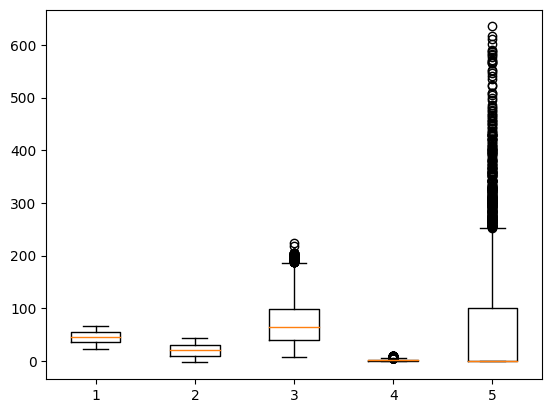

               Age   Experience       Income        CCAvg     Mortgage
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000
mean     45.338400    20.104600    73.774200     1.937938    56.498800
std      11.463166    11.467954    46.033729     1.747659   101.713802
min      23.000000    -3.000000     8.000000     0.000000     0.000000
25%      35.000000    10.000000    39.000000     0.700000     0.000000
50%      45.000000    20.000000    64.000000     1.500000     0.000000
75%      55.000000    30.000000    98.000000     2.500000   101.000000
max      67.000000    43.000000   224.000000    10.000000   635.000000
               Age   Experience       Income        CCAvg     Mortgage
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000
mean      0.460204     0.196167     0.614764     0.016572     0.265838
std       0.223111     0.133781     0.266927     0.012457     0.402282
min       0.042890    -0.081051     0.065734     0.000000     0.000000
25%   

In [ ]:
#참조 데이터는 7:3 비율로 트레이닝 데이터와 테스트 데이터로 구분하고, 트레이닝 데이터와 테스트 데이터의 대출여부(y)의 비율도 유지한다. 또한 normalizer를 사용하여 스케일링을 진행한다.
df5.rename(columns={'ZIP Code':'ZIPCode'}, inplace=True)
df5.rename(columns={'Personal Loan':'PersonalLoan'}, inplace=True)
df5.rename(columns={'Securities Account':'SecuritiesAccount'}, inplace=True)
df5.rename(columns={'CD Account':'CDAccount'}, inplace=True)
df6 = df5.copy()
df7 = df5.copy()
df8 = df5.copy()
scale = ['Age','Experience','Income','CCAvg','Mortgage']
x = ['Age','Experience','Income','ZIPCode','Family','CCAvg','Education','Mortgage','SecuritiesAccount','CDAccount','Online','CreditCard']
y = ['PersonalLoan']

from sklearn.preprocessing import Normalizer # 행 단위로 각 행의 feature 간 유클리드 거리가 1이 되도록 조정
nor = Normalizer()
df6[scale] = nor.fit_transform(df5[scale])

from sklearn.preprocessing import StandardScaler # 열 단위로 각 열의 평균은 0, 분산은 1이 되도록 조정
std = StandardScaler()
df7[scale] = std.fit_transform(df5[scale])

from sklearn.preprocessing import RobustScaler # 평균과 분산 대신 중앙값과 IRQ을 사용하기 떄문에 이상치에 대한 영향 적음
rs = RobustScaler()
df8[scale] = rs.fit_transform(df5[scale])

import matplotlib.pyplot as plt
plt.boxplot(df5[scale])
plt.show()
print(df5[scale].describe())
print(df6[scale].describe())
print(df7[scale].describe())
print(df8[scale].describe())

from sklearn.model_selection import train_test_split
#help(train_test_split)
#x_train, x_test, y_train, y_test = train_test_split(df6[x], df6[y], test_size = 0.3, stratify = df6[y])
x_train, x_test, y_train, y_test = train_test_split(df8[x], df8[y], test_size = 0.3, stratify = df8[y])
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [ ]:
#은행에서 수집한 고객 5,000명의 금융정보에 따른 대출여부가 들어있는 참조 데이터를 사용하여 대출여부를 분류하는 가장 최적의 이웃의 크기값(k)을 구하고, 이때 분류정확도를 산출하시오.
from sklearn.neighbors import KNeighborsClassifier
df_index = []
train_acc = []
test_acc = []
neighbors_settings = range(1, 25)
for k in neighbors_settings:
  knc = KNeighborsClassifier(n_neighbors = k)
  knc.fit(x_train, y_train.values.ravel())
  df_index.append(k)
  test_acc.append(knc.score(x_test, y_test))

testset = pd.DataFrame(zip(test_acc), index = df_index, columns=['acc'])
#print(testset)
print(testset['acc'].idxmax(), testset['acc'].max())

3 0.9126666666666666


# **Python 이기적(2024년) 모의고사 2회**    

##### **Parkinsons 데이터 (macro.F1)**
```
데이터셋 : https://raw.githubusercontent.com/eyejjang/BigData/main/dataset_igijeok/Parkinsons.csv    
```
```
 • name : 이름
 • MDVP:Fo(Hz) : 평균 보컬 기본 주파수
 • MDVP:Fhi(Hz) : 최대 보컬 기본 주파수
 • MDVP:Flo(Hz) : 최소 보컬 기본 주파수
 • MDVP:Jitter(%) - 주기 지속 시간의 사이클 간 변동성 백분율
 • MDVP:Jitter(Abs) - 주기 지속 시간의 사이클 간 변동성의 절대값
 • MDVP:RAP - 피치 교란의 상대적 측정값
 • MDVP:PPQ - 피치 섭동 지수
 • Jitter:DDP - 지터 사이클 간 차이의 평균 절대 차이
 • MDVP:Shimmer - 음성 진폭의 변동폭
 • MDVP:Shimmer(dB) - 음성 진폭의 변화(dB)
 • Shimmer:APQ3 - 세 가지 진폭의 평균에 대해 측정된 세 점 진폭 섭동 지수
 • Shimmer:APQ5 - 세 진폭의 평균에 대해 측정된 다섯 개의 포인트 진폭 섭동 지수
 • MDVP:APQ - MDVP의 진폭 섭동 지수
 • Shimmer:DDA - 연속된 기간의 진폭 간의 평균 절대 차이
 • NHR - 잡음 대 고조파 비율 및
 • HNR - 고조파 대 잡음비
 • status - 피험자의 건강 상태 (종속변수) | 1:파킨슨병, 0:건강함
 • RPDE - 반복 기간 밀도 엔트로피
 • DFA - 신호 프랙탈 스케일링 지수
 • spread1 - 상대 반음 변동 발생의 이산 확률 분포
 • spread2 - 기본 주파수 변동의 세 가지 비선형 측정값
 • D2 - 상관관계 차원
 • PPE - 상대 반음 변화 발생의 이산 확률 분포의 엔트로피
```
• 환자들의 뇌를 촬영한 사진의 상태를 기록한 자료에 각 환자의 상태를 status(1 = 파킨슨병 진단, 0 = 파킨슨병 아님)로 추가한 테이블이다.   
• 데이터셋을 이용하여 파킨슨병을 예측하는 모델을 로지스틱 회귀모형을 적용하여 생성하고, 이때 파킨슨병을 예측하는데 영향을 미치는 변수를 중요한 순서대로 3개 선정하시오.     
• 이 모델에서 파킨슨병으로 진단되는 기준(threshold 또는 cutoff)을 0.5로 했을 때와 0.8로 했을 때의 f1-score를 비교하고 해석하시오. (단, 다음 조건을 지켜서 물음에 답하시오)     
• 추가 조건    
  1.   필요 없는 컬럼인 'name' 제거    
  2.   데이터 정규화는 Min-Max Scler 사용    
  3.   로지스틱 회귀를 위해 상수항 추가     
  4.   Status는 카테고리 타입으로 변환    
  5.   트레이닝셋과 테스트셋의 비율은 9:1    
  6.   모델은 로지스틱 회귀분석 사용    
  7.   모델의 최적화 방법론으로 'bfgs' 사용    

In [ ]:
import pandas as pd
df7 = pd.read_csv('https://raw.githubusercontent.com/eyejjang/BigData/main/dataset_igijeok/Parkinsons.csv')
print(df7.head())
print(df7.info())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [ ]:
#statsmodels.api Logit 사용
scaler = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE']
x = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE']
y = ['status']

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df8[scaler] = mm.fit_transform(df8[scaler])
df8['status'] = df8['status'].astype('category')

import statsmodels.api as sm
df8 = sm.add_constant(df8, has_constant='add')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df8[x], df8[y].values.ravel(), test_size=0.1, stratify=df8[y].values.ravel(), random_state = 2024)
#print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
lr = sm.Logit(y_train, x_train).fit(method='bfgs', maxiter=1000)
#print(lr.summary())
pvals = pd.DataFrame(lr.pvalues, columns=['pvalue'])
ans = pvals.nsmallest(3, 'pvalue', keep='first')
print(ans)

Optimization terminated successfully.
         Current function value: 0.210110
         Iterations: 275
         Function evaluations: 276
         Gradient evaluations: 276
           pvalue
RPDE     0.051704
spread2  0.067920
PPE      0.162402


In [ ]:
#############################################################
# 설욱님 풀이
#############################################################
df1 = df.copy()

df1 = df1.drop('name', axis = 1)
df1.head()

# 반응변수 status 카테고리형으로 변환
df1['status'] = df1['status'].astype('category')
df1.info()

# 트레이닝, 테스트셋 분리
from sklearn.model_selection import train_test_split

train, test = train_test_split(df1, test_size = 0.1, stratify = df1['status'], random_state = 123)

print(train.shape, test.shape)

# Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler

COL_NUM=df1.columns.drop('status')

scaler = MinMaxScaler()
train[COL_NUM] = scaler.fit_transform(train[COL_NUM])
test[COL_NUM] = scaler.transform(test[COL_NUM])

import re

temp=[]
for col in range(0,len(train.columns)):
  print(col)
  temp.append(re.sub('\W+', '', train.columns[col]))

train.columns=temp
test.columns=temp

print(train.head())
print('*'*100)
print(test.head())

import statsmodels.formula.api as smf

train['status']=train['status'].astype('int') # 이거 해야 에러 안 뜨는데, 문제에서는 왜 카테고리 조건을 준거지?

X_columns=train.columns.drop('status')

formula='status~'+'+'.join(X_columns)

md = smf.logit(formula, data=train).fit(method='bfgs', maxiter=1000)
print(md.summary())
#(1) 파킨슨병을 예측하는 데 영향을 미치는 변수 Top3

print(md.pvalues.sort_values()) # PPE, spread2, MDVPJitter

pred = md.predict(test)
print(pred)

pred_5 = pred.copy()
pred_8 = pred.copy()

pred_5[pred_5 >= 0.5] = 1
pred_5[pred_5 < 0.5] = 0

pred_8[pred_8 >= 0.8] = 1
pred_8[pred_8 < 0.8] = 0

from sklearn.metrics import f1_score
f1_5 = f1_score(test['status'], pred_5, average = 'macro')
f1_8 = f1_score(test['status'], pred_8, average = 'macro')

print(round(f1_5, 4)) # 0.7849
print(round(f1_8, 4)) # 0.6865

In [ ]:
############################################## ****PATSY****
#statsmodels.formula.api logit 사용
##############################################
df8 = df7.drop('name', axis=1)
#특수문자가 formula 부분에 들어가면 에러가 발생하여 컬럼명에서 특수문제 제거
for i in df8.columns :
    i2 = i.replace(':','').replace('%','').replace('(','').replace(')','')
    df8.rename(columns={i:i2},inplace=True)
#print(df8.info())
scaler = ['MDVPFoHz', 'MDVPFhiHz', 'MDVPFloHz', 'MDVPJitter', 'MDVPJitterAbs', 'ShimmerAPQ3', 'ShimmerAPQ5', 'MDVPAPQ', 'ShimmerDDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE', 'MDVPRAP', 'MDVPPPQ', 'JitterDDP', 'MDVPShimmer', 'MDVPShimmerdB']
x = ['MDVPFoHz', 'MDVPFhiHz', 'MDVPFloHz', 'MDVPJitter', 'MDVPJitterAbs', 'ShimmerAPQ3', 'ShimmerAPQ5', 'MDVPAPQ', 'ShimmerDDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE', 'MDVPRAP', 'MDVPPPQ', 'JitterDDP', 'MDVPShimmer', 'MDVPShimmerdB']
y = ['status']

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df8[scaler] = mm.fit_transform(df8[scaler])
#종속변수가 범주형 데이터 타입을 가지면 아래의 에러가 발생하여 종속변수를 범주형 변수 타입으로 변환하지 않음
#ValueError: endog has evaluated to an array with multiple columns that has shape (175, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).
#df8['status'] = df8['status'].astype('category')

from sklearn.model_selection import train_test_split
train, test = train_test_split(df8, test_size=0.1, stratify=df8[y].values.ravel())
print(train.shape, test.shape)

formula1 = "status ~ MDVPFoHz + MDVPFhiHz + MDVPFloHz + MDVPJitter + MDVPJitterAbs + ShimmerAPQ3 + ShimmerAPQ5 + MDVPAPQ + ShimmerDDA + NHR + HNR + RPDE + DFA + spread1 + spread2 + D2 + PPE + MDVPRAP + MDVPPPQ + JitterDDP + MDVPShimmer + MDVPShimmerdB"

#formula 부분에 JitterDDP 컬럼을 추가하면 에러 발생하여 제거한 formula
formula2 = "status ~ MDVPFoHz + MDVPFhiHz + MDVPFloHz + MDVPJitter + MDVPJitterAbs + ShimmerAPQ3 + ShimmerAPQ5 + MDVPAPQ + ShimmerDDA + NHR + HNR + RPDE + DFA + spread1 + spread2 + D2 + PPE + MDVPRAP + MDVPPPQ + MDVPShimmer + MDVPShimmerdB"
#print(train['JitterDDP'].value_counts())

import statsmodels.formula.api as smf
lr = smf.logit(formula2, train).fit()
print(lr.summary())

pvals = pd.DataFrame(lr.pvalues, columns=['pvalue'])
ans = pvals.nsmallest(3, 'pvalue', keep='first')
print(ans)


(175, 23) (20, 23)
         Current function value: 3.319477
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                  175
Model:                          Logit   Df Residuals:                      153
Method:                           MLE   Df Model:                           21
Date:                Sat, 08 Jun 2024   Pseudo R-squ.:                  -4.953
Time:                        00:45:00   Log-Likelihood:                -580.91
converged:                      False   LL-Null:                       -97.576
Covariance Type:            nonrobust   LLR p-value:                     1.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -181.9323    182.663     -0.996      0.319    -539.944     176.080
MDVPFoHz       -168.1878    170.403  

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
